In [1]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Get Column Information
market_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, bitcoin to digibyte
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price_change_percentage_24h   41 non-null     float64
 1   price_change_percentage_7d    41 non-null     float64
 2   price_change_percentage_14d   41 non-null     float64
 3   price_change_percentage_30d   41 non-null     float64
 4   price_change_percentage_60d   41 non-null     float64
 5   price_change_percentage_200d  41 non-null     float64
 6   price_change_percentage_1y    41 non-null     float64
dtypes: float64(7)
memory usage: 2.6+ KB


In [5]:
# Get column Names
market_data_df.columns

Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')

### Prepare the Data

In [6]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
market_data_df_scaled=StandardScaler().fit_transform(market_data_df[['price_change_percentage_24h',
 'price_change_percentage_7d',
 'price_change_percentage_14d',
 'price_change_percentage_30d',
 'price_change_percentage_60d',
 'price_change_percentage_200d',
 'price_change_percentage_1y']])
market_data_df_scaled

array([[ 5.08529366e-01,  4.93193071e-01,  7.72200433e-01,
         2.35459633e-01, -6.74950963e-02, -3.55953481e-01,
        -2.51636882e-01],
       [ 1.85445894e-01,  9.34445040e-01,  5.58692121e-01,
        -5.43409317e-02, -2.73482725e-01, -1.15759474e-01,
        -1.99352110e-01],
       [ 2.17739616e-02, -7.06336853e-01, -2.16804207e-02,
        -6.10301536e-02,  8.00452481e-03, -5.50246924e-01,
        -2.82060506e-01],
       [-4.07643829e-02, -8.10928066e-01,  2.49457974e-01,
        -5.03879651e-02, -3.73164019e-01, -4.58258816e-01,
        -2.95546142e-01],
       [ 1.19303608e+00,  2.00095907e+00,  1.76061001e+00,
         5.45842065e-01, -2.91202870e-01, -4.99847761e-01,
        -2.70316950e-01],
       [ 8.91870708e-01,  1.32729453e+00,  8.00214184e-01,
        -5.71478992e-02,  7.78653106e-01, -1.88231917e-01,
        -2.25532605e-01],
       [ 1.13972400e-02,  2.57225091e+00,  1.10164693e+00,
        -4.90495415e-01, -9.31954023e-01,  3.87758986e-01,
        -1.8284399

In [7]:
# Create a DataFrame with the scaled data
market_data_transformed_df = pd.DataFrame(market_data_df_scaled, columns=['price_change_percentage_24h',
 'price_change_percentage_7d',
 'price_change_percentage_14d',
 'price_change_percentage_30d',
 'price_change_percentage_60d',
 'price_change_percentage_200d',
 'price_change_percentage_1y'])

# Copy the crypto names from the original data
market_data_transformed_df["coin_id"] = market_data_df.index

# Set the coinid column as index
market_data_transformed_df = market_data_transformed_df.set_index("coin_id")

# Display sample data
market_data_transformed_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [8]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = list(range(1, 11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=1)
    k_model.fit(market_data_transformed_df)
    inertia.append(k_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow.head(10)

C:\Users\Dharmesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Dharmesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Dharmesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Dharmesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory le

,k,inertia
0,1,287.000000
1,2,212.123342
2,3,145.897940
3,4,131.457370
4,5,66.317106
5,6,57.402668
6,7,49.212644
7,8,44.799804
8,9,33.859468
9,10,29.250314


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

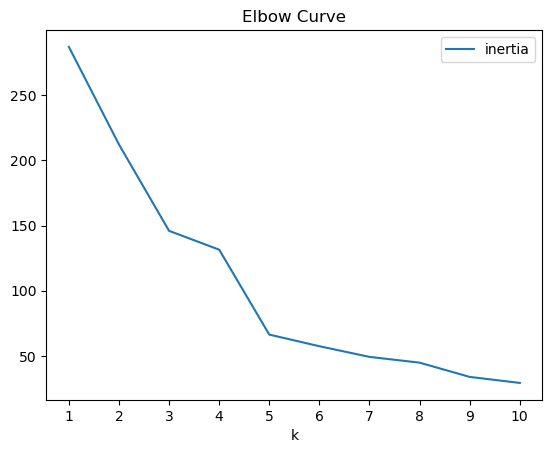

In [9]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow.plot.line(x="k",
                   y="inertia",
                   title="Elbow Curve",
                   xticks=k)

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** The best value for 'K' appears to be either 3 or 4. This can be validated by plotting the key features for both the clusters

In [10]:
# Determine the rate of decrease between each k value
k = df_elbow["k"]
inertia = df_elbow["inertia"]
for i in range(1, len(k)):
    percentage_decrease = (inertia[i-1] - inertia[i]) / inertia[i-1] * 100
    print(f"Percentage decrease from k={k[i-1]} to k={k[i]}: {percentage_decrease:.2f}%")

Percentage decrease from k=1 to k=2: 26.09%
Percentage decrease from k=2 to k=3: 31.22%
Percentage decrease from k=3 to k=4: 9.90%
Percentage decrease from k=4 to k=5: 49.55%
Percentage decrease from k=5 to k=6: 13.44%
Percentage decrease from k=6 to k=7: 14.27%
Percentage decrease from k=7 to k=8: 8.97%
Percentage decrease from k=8 to k=9: 24.42%
Percentage decrease from k=9 to k=10: 13.61%


### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [11]:
# Initialize the K-Means model using the best value for k
# Define the model with 3 clusters
model = KMeans(n_clusters=3, n_init='auto', random_state=1)

In [12]:
# Fit the K-Means model using the scaled data
model.fit(market_data_transformed_df)


C:\Users\Dharmesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, n_init='auto', random_state=1)

In [13]:
# Predict the clusters to group the cryptocurrencies using the scaled data
# Make predictions
k_3 = model.predict(market_data_transformed_df)

# View the resulting array of cluster values.
k_3

array([1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2])

In [14]:
# Create a copy of the DataFrame
market_data_predictions_df = market_data_transformed_df.copy()


In [15]:
# Add a new column to the DataFrame with the predicted clusters
market_data_predictions_df['crypto_cluster'] = k_3

# Display sample data
market_data_predictions_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,crypto_cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,1
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,1
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,2
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,2
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,1


<Axes: title={'center': 'Clustering with n=3'}, xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

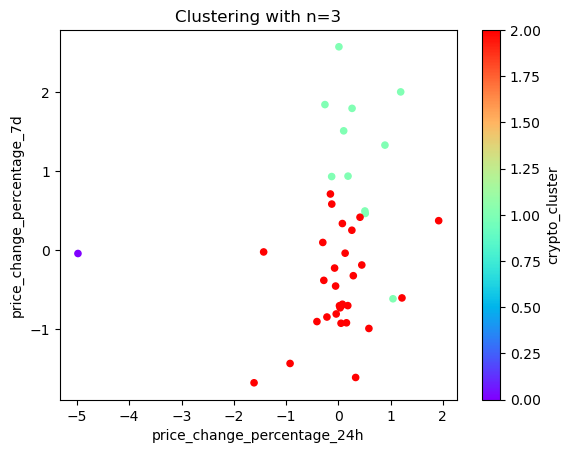

In [16]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
# Plot the clusters with n=3
market_data_predictions_df.plot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="crypto_cluster",
    title="Clustering with n=3",
    colormap="rainbow"
    )

<Axes: title={'center': 'Clustering with n=3'}, xlabel='price_change_percentage_7d', ylabel='price_change_percentage_200d'>

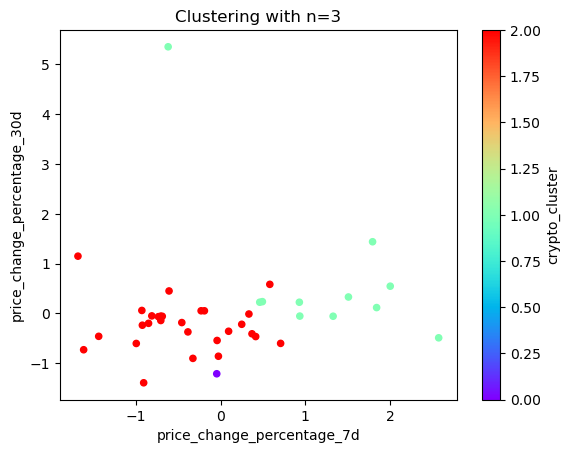

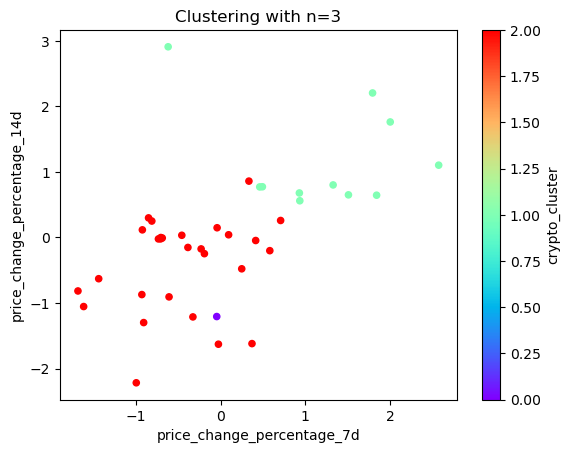

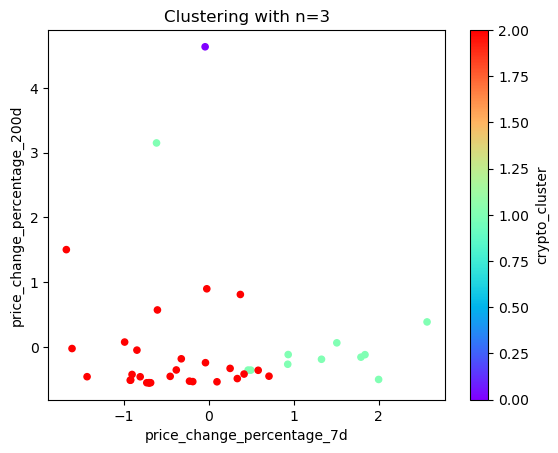

In [17]:
# Check other plots for 3 clusters
# Plot the clusters with n=3
market_data_predictions_df.plot.scatter(
    x="price_change_percentage_7d",
    y="price_change_percentage_30d",
    c="crypto_cluster",
    title="Clustering with n=3",
    colormap="rainbow"
    )
# Plot the clusters
market_data_predictions_df.plot.scatter(
    x="price_change_percentage_7d",
    y="price_change_percentage_14d",
    c="crypto_cluster",
    title="Clustering with n=3",
    colormap="rainbow"
    )
# Plot the clusters
market_data_predictions_df.plot.scatter(
    x="price_change_percentage_7d",
    y="price_change_percentage_200d",
    c="crypto_cluster",
    title="Clustering with n=3",
    colormap="rainbow"
    )

In [18]:
# Define the model with 4 clusters
model = KMeans(n_clusters=4, n_init='auto', random_state=1)

# Fit the model
model.fit(market_data_transformed_df)

# Make predictions
k_4 = model.predict(market_data_transformed_df)

# Create a copy of the preprocessed data
market_data_predictions_df4 = market_data_transformed_df.copy()

# Add a class column with the labels
market_data_predictions_df4['crypto_cluster'] = k_4

# Display predicted Dataframe
market_data_predictions_df4.head()

C:\Users\Dharmesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,crypto_cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,1
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,1
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,2
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,2
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,1


In [19]:
# View the resulting array of cluster values.
k_4

array([1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 1, 2, 0, 1,
       2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 3, 2, 0, 0, 1, 0, 2, 2, 0])

<Axes: title={'center': 'Clustering with n=4'}, xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

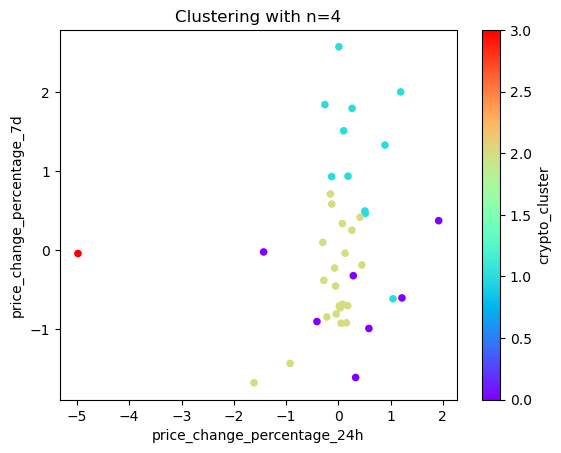

In [20]:
# Plot the clusters with n=4
market_data_predictions_df4.plot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="crypto_cluster",
    title="Clustering with n=4",
    colormap="rainbow"
    )

<Axes: title={'center': 'Clustering with n=4'}, xlabel='price_change_percentage_7d', ylabel='price_change_percentage_200d'>

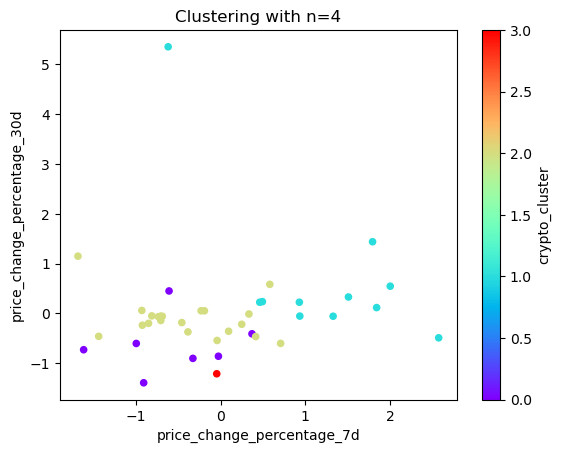

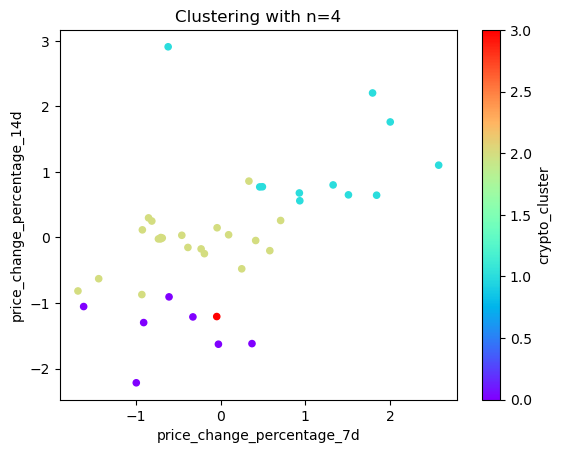

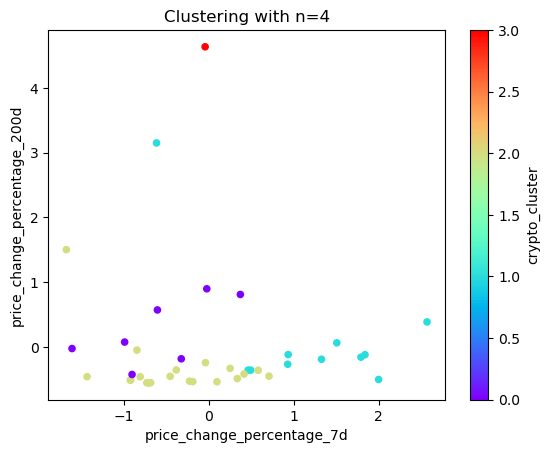

In [21]:
# Plot the clusters with n=4
market_data_predictions_df4.plot.scatter(
    x="price_change_percentage_7d",
    y="price_change_percentage_30d",
    c="crypto_cluster",
    title="Clustering with n=4",
    colormap="rainbow"
    )
# Plot the clusters
market_data_predictions_df4.plot.scatter(
    x="price_change_percentage_7d",
    y="price_change_percentage_14d",
    c="crypto_cluster",
    title="Clustering with n=4",
    colormap="rainbow"
    )
# Plot the clusters
market_data_predictions_df4.plot.scatter(
    x="price_change_percentage_7d",
    y="price_change_percentage_200d",
    c="crypto_cluster",
    title="Clustering with n=4",
    colormap="rainbow"
    )

In [22]:
# Define the model with 5 clusters
model = KMeans(n_clusters=5, n_init='auto', random_state=1)

# Fit the model
model.fit(market_data_transformed_df)

# Make predictions
k_5 = model.predict(market_data_transformed_df)

# Create a copy of the preprocessed data
market_data_predictions_df5 = market_data_transformed_df.copy()

# Add a class column with the labels
market_data_predictions_df5['crypto_cluster'] = k_5

# Display predicted Dataframe
market_data_predictions_df5.head()

C:\Users\Dharmesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,crypto_cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,1
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,1
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,2
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,2
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,1


<Axes: title={'center': 'Clustering with n=5'}, xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

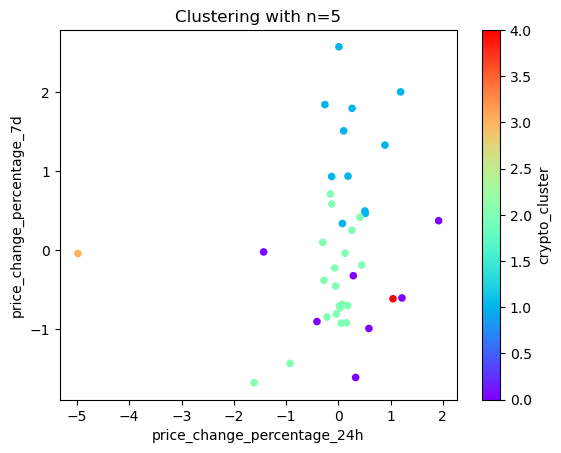

In [23]:
# Plot the clusters with n=5
market_data_predictions_df5.plot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="crypto_cluster",
    title="Clustering with n=5",
    colormap="rainbow"
    )

<Axes: title={'center': 'Clustering with n=5'}, xlabel='price_change_percentage_7d', ylabel='price_change_percentage_200d'>

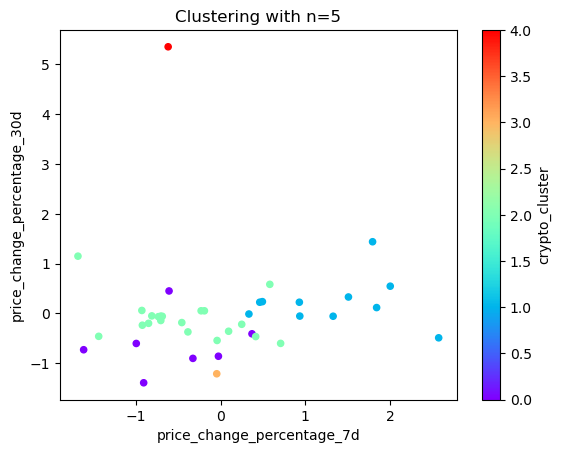

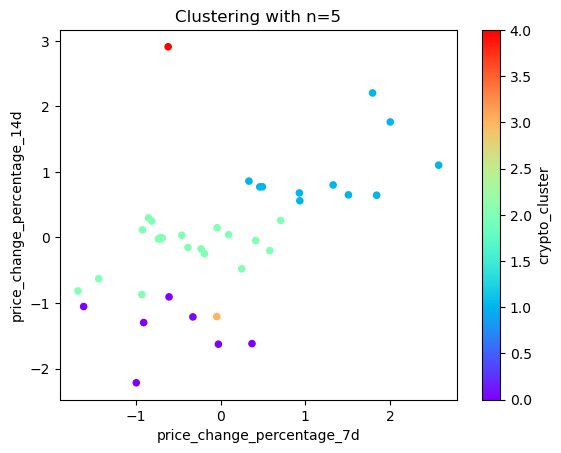

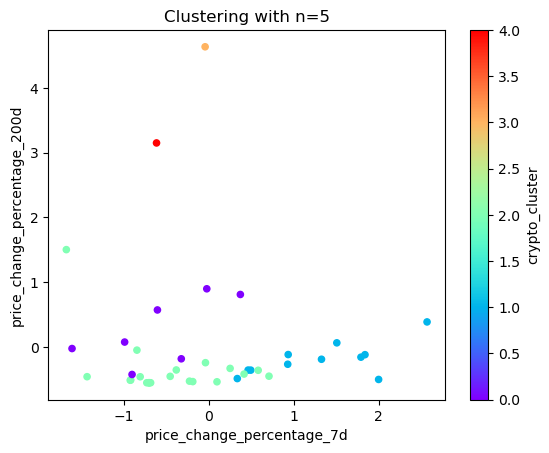

In [24]:
# Plot the clusters with n=5
market_data_predictions_df5.plot.scatter(
    x="price_change_percentage_7d",
    y="price_change_percentage_30d",
    c="crypto_cluster",
    title="Clustering with n=5",
    colormap="rainbow"
    )
# Plot the clusters
market_data_predictions_df5.plot.scatter(
    x="price_change_percentage_7d",
    y="price_change_percentage_14d",
    c="crypto_cluster",
    title="Clustering with n=5",
    colormap="rainbow"
    )
# Plot the clusters
market_data_predictions_df5.plot.scatter(
    x="price_change_percentage_7d",
    y="price_change_percentage_200d",
    c="crypto_cluster",
    title="Clustering with n=5",
    colormap="rainbow"
    )

#### It appears that the KMeans prediction is better with 4 clusters. Clustering with 3 clusters, while serviceable, it can be improved by using different plot with 4 clusters. As the above figures for different clusters shows, by using the plot between "price_change_percentage_7d" and "price_change_percentage_14d", the clustering with n_clusters=4 is better. 

### Optimize Clusters with Principal Component Analysis.

In [25]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [26]:
market_data_transformed_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [27]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
market_data_pca = pca.fit_transform(market_data_transformed_df)

# View the first five rows of the DataFrame. 
market_data_pca[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [28]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

In [29]:
# Sum of explained variance
pca.explained_variance_ratio_.sum()

0.8950316570309841

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 89.5%

In [30]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you
# Creating a DataFrame with the PCA data
market_data_pca_df = pd.DataFrame(
    market_data_pca,
    columns=["PCA1", "PCA2", "PCA3"]
)

# Copy the crypto names from the original data
market_data_pca_df["coin_id"] = market_data_df.index

# Set the coinid column as index
market_data_pca_df= market_data_pca_df.set_index("coin_id")

# Display sample data
market_data_pca_df.head(10)

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


### Find the Best Value for k Using the PCA Data

In [31]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = list(range(1, 11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=1)
    k_model.fit(market_data_pca_df)
    inertia.append(k_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow.head(10)

C:\Users\Dharmesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Dharmesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Dharmesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Dharmesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory le

,k,inertia
0,1,256.874086
1,2,168.811896
2,3,115.918077
3,4,49.665497
4,5,39.094217
5,6,27.961695
6,7,24.462735
7,8,19.451747
8,9,13.755814
9,10,13.119661


<Axes: title={'center': 'Elbow Curve with PCA'}, xlabel='k'>

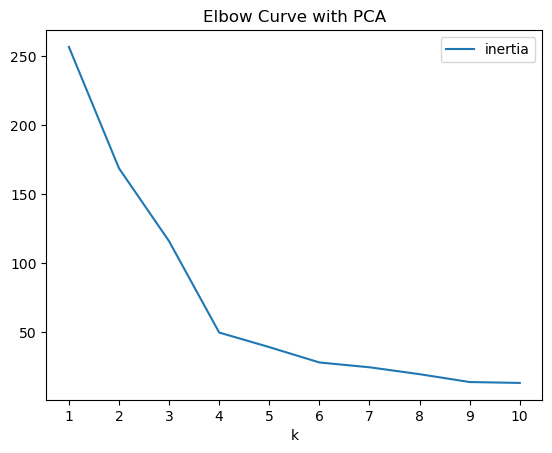

In [32]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow.plot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve with PCA", 
    xticks=k
)

In [33]:
# Determine the rate of decrease between each k value
k = df_elbow["k"]
inertia = df_elbow["inertia"]
for i in range(1, len(k)):
    percentage_decrease = (inertia[i-1] - inertia[i]) / inertia[i-1] * 100
    print(f"Percentage decrease from k={k[i-1]} to k={k[i]}: {percentage_decrease:.2f}%")

Percentage decrease from k=1 to k=2: 34.28%
Percentage decrease from k=2 to k=3: 31.33%
Percentage decrease from k=3 to k=4: 57.15%
Percentage decrease from k=4 to k=5: 21.28%
Percentage decrease from k=5 to k=6: 28.48%
Percentage decrease from k=6 to k=7: 12.51%
Percentage decrease from k=7 to k=8: 20.48%
Percentage decrease from k=8 to k=9: 29.28%
Percentage decrease from k=9 to k=10: 4.62%


#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** It appears that the best value for k is 4 using the PCA data


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** Yes it does. The original data seemed to suggest best clustering with K=3, whereas for PCA data, it suggests K=4 is a better cluster.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [34]:
# Initialize the K-Means model using the best value for k

In [35]:
# Define the model with 4 clusters
model = KMeans(n_clusters=4, n_init='auto', random_state=1)

# Fit the model
model.fit(market_data_pca_df)

# Make predictions
k_4 = model.predict(market_data_pca_df)

# Create a copy of the PCA DataFrame
market_data_pca_predictions_df4 = market_data_pca_df.copy()

# Add a class column with the labels
market_data_pca_predictions_df4["crypto_cluster"] = k_4
market_data_pca_predictions_df4.head()

C:\Users\Dharmesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,PCA1,PCA2,PCA3,crypto_cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,1
ethereum,-0.458261,0.458466,0.952877,1
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,1


In [36]:
k_4

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 3, 0, 0, 0, 0])

<Axes: title={'center': 'Clustering Using PCA with n=4'}, xlabel='PCA1', ylabel='PCA2'>

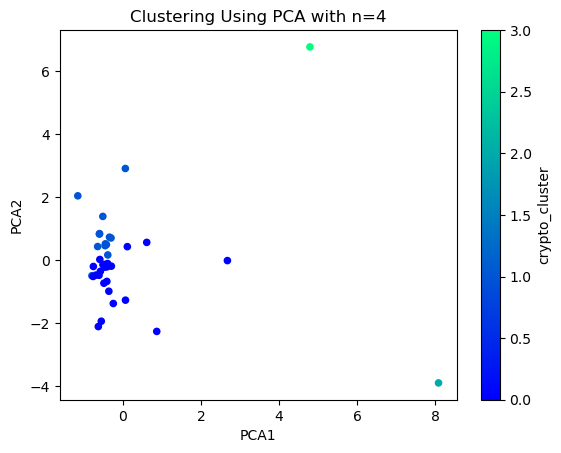

In [37]:
# Plot the clusters with n=4
market_data_pca_predictions_df4.plot.scatter(
    x="PCA1",
    y="PCA2",
    c="crypto_cluster",
    title="Clustering Using PCA with n=4",
    colormap='winter')


<Axes: title={'center': 'Clustering Using PCA with n=4'}, xlabel='PCA2', ylabel='PCA3'>

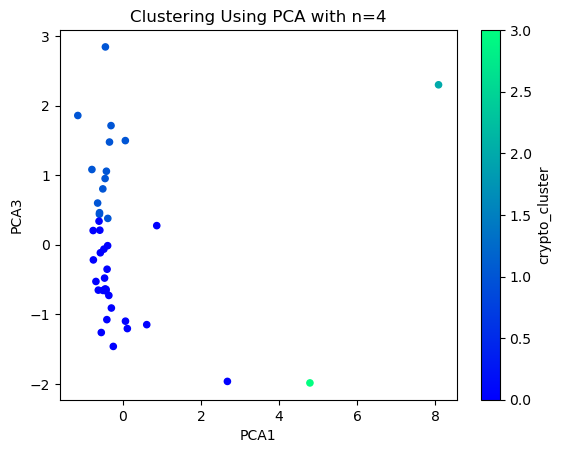

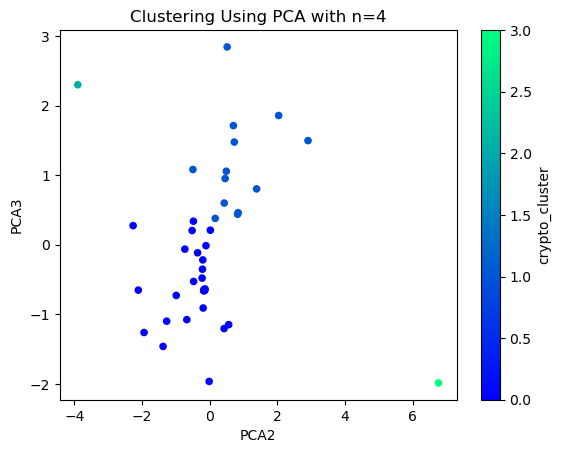

In [38]:
# Plot the clusters
market_data_pca_predictions_df4.plot.scatter(
    x="PCA1",
    y="PCA3",
    c="crypto_cluster",
    title="Clustering Using PCA with n=4",
    colormap='winter')
# Plot the clusters
market_data_pca_predictions_df4.plot.scatter(
    x="PCA2",
    y="PCA3",
    c="crypto_cluster",
    title="Clustering Using PCA with n=4",
    colormap='winter')

In [39]:
#  Define the model with 3 clusters
model = KMeans(n_clusters=3, n_init='auto', random_state=1)

# Fit the K-Means model using the PCA data
model.fit(market_data_pca_df)

# Predict the clusters to group the cryptocurrencies using the PCA data
k_3 = model.predict(market_data_pca_df)

# Create a copy of the DataFrame with the PCA data
market_data_pca_predictions_df = market_data_pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
market_data_pca_predictions_df["crypto_cluster"] = k_3

# Display sample data
market_data_pca_predictions_df.head()

C:\Users\Dharmesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,PCA1,PCA2,PCA3,crypto_cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,1
ethereum,-0.458261,0.458466,0.952877,1
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,1


In [40]:
# Print the resulting array of cluster values.
k_3

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0])

<Axes: title={'center': 'Clustering Using PCA with n=3'}, xlabel='PCA1', ylabel='PCA2'>

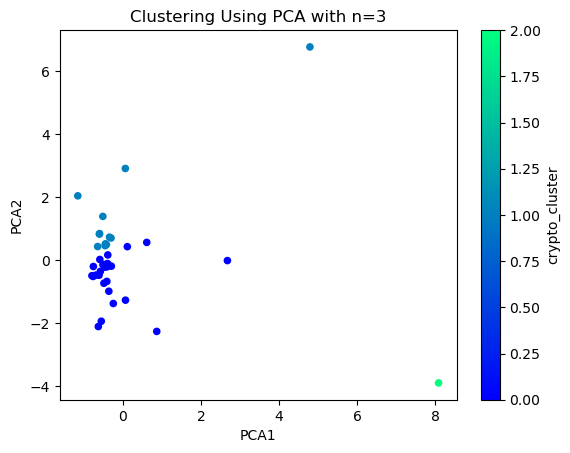

In [41]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
# Plot the clusters with n=3
market_data_pca_predictions_df.plot.scatter(
    x="PCA1",
    y="PCA2",
    c="crypto_cluster",
    title="Clustering Using PCA with n=3",
    colormap='winter')

<Axes: title={'center': 'Clustering Using PCA with n=3'}, xlabel='PCA2', ylabel='PCA3'>

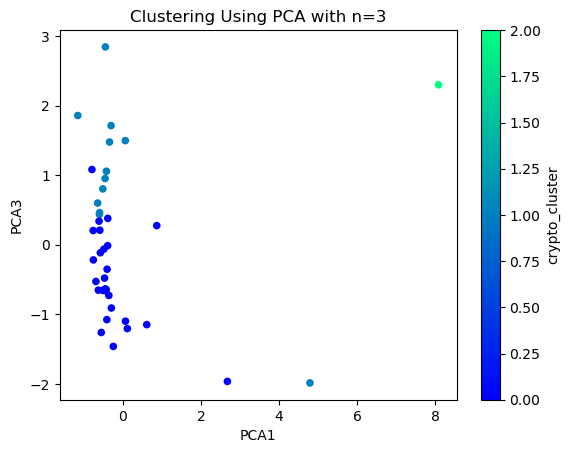

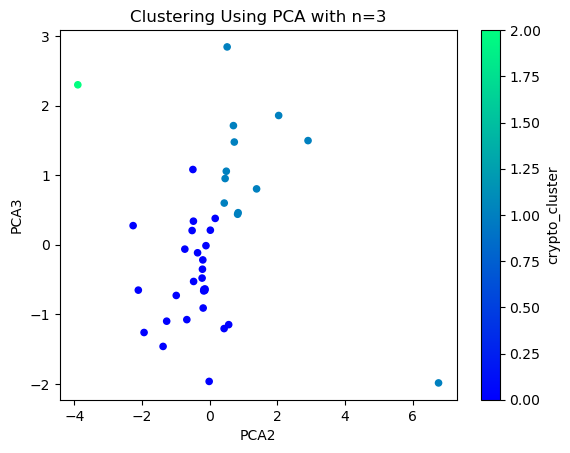

In [42]:
# Plot the clusters with n=3
market_data_pca_predictions_df.plot.scatter(
    x="PCA1",
    y="PCA3",
    c="crypto_cluster",
    title="Clustering Using PCA with n=3",
    colormap='winter')
# Plot the clusters with n=3
market_data_pca_predictions_df.plot.scatter(
    x="PCA2",
    y="PCA3",
    c="crypto_cluster",
    title="Clustering Using PCA with n=3",
    colormap='winter')

### Determine the Weights of Each Feature on each Principal Component

In [43]:
# Use the columns from the original scaled DataFrame as the index.
pca_component_weights = pd.DataFrame(pca.components_.T, columns=['PCA1', 'PCA2', 'PCA3'], index=market_data_transformed_df.columns)
pca_component_weights

,PCA1,PCA2,PCA3
price_change_percentage_24h,-0.416728,0.358162,-0.218795
price_change_percentage_7d,-0.102432,0.227432,0.787670
price_change_percentage_14d,-0.009162,0.540415,0.349534
price_change_percentage_30d,0.191523,0.562182,-0.181744
price_change_percentage_60d,0.320365,0.434040,-0.361377
price_change_percentage_200d,0.594468,0.027735,0.039733
price_change_percentage_1y,0.568379,-0.150789,0.210541


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:**

PCA1: 'price_change_percentage_200d' has the biggest influences on PCA1 with 'price_change_percentage_1y' as the second best influence on PCA1

PCA2: 'price_change_percentage_30d' has most influence on PCA2, with 'price_change_percentage_14d' being close second for its influence on PCA2

PCA3: 'price_change_percentage_7d' has the most influences on PCA3, with 'price_change_percentage_60d' being a close second for its influence on PCA3 (negatively).
    

#### Based on these results, our original graph of using the "price_change_percentage_24h" and "price_change_percentage_7d" before applying PCA may be "good enough" to segment the data with 3 clusters, but the clustering results would have been slightly improved using 4 clusters and using a scatterplot between "price_change_percentage_7d" and "price_change_percentage_14d" as shown below. 

#### By using the PCA analysis, we can confirm that "price_change_percentage_7d" and "price_change_percentage_14d" provide the best separation amongst various cluster plots given the influence of these features on PCA compnents PCA3 and PCA2 respectively. Similar results can be achived using a plot betweeen "price_change_percentage_7d" and "price_change_percentage_200d" or between "price_change_percentage_7d" and "price_change_percentage_30d"

<Axes: title={'center': 'Clustering Using PCA with n=4'}, xlabel='PCA2', ylabel='PCA3'>

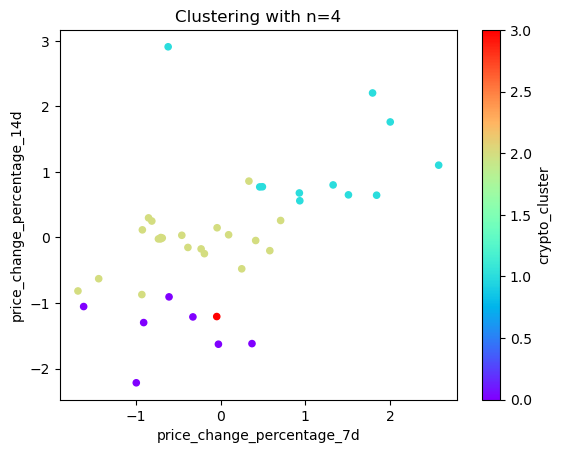

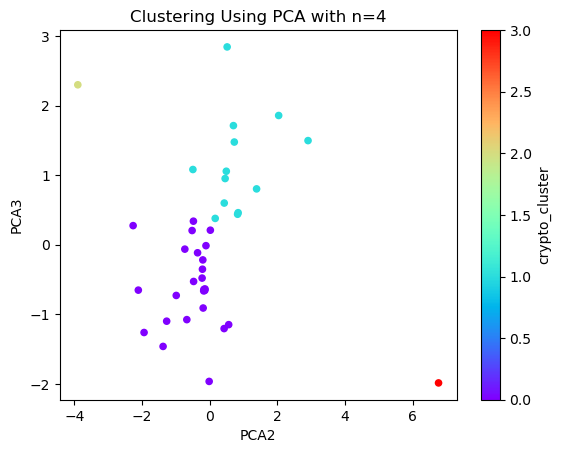

In [44]:
# Plot the clusters with n=4
market_data_predictions_df4.plot.scatter(
    x="price_change_percentage_7d",
    y="price_change_percentage_14d",
    c="crypto_cluster",
    title="Clustering with n=4",
    colormap="rainbow"
    )
# Plot the clusters using PCA with n=4
market_data_pca_predictions_df4.plot.scatter(
    x="PCA2",
    y="PCA3",
    c="crypto_cluster",
    title="Clustering Using PCA with n=4",
    colormap='rainbow')